In [1]:
import numpy as np
import pandas as pd

In [5]:
#Read the data present in dataset
data1 = pd.read_csv('rainfall in india 1901-2015 (1).csv')
print("Enter the name of state :\n")
arr = data1.SUBDIVISION.unique()
i=0
for state in arr:
  print(str(i) +".) "+ state +"\n" )
  i+=1
state = input("Select State: ")

data=data1.loc[data1["SUBDIVISION"]==state]


Enter the name of state :

0.) ANDAMAN & NICOBAR ISLANDS

1.) ARUNACHAL PRADESH

2.) ASSAM & MEGHALAYA

3.) NAGA MANI MIZO TRIPURA

4.) SUB HIMALAYAN WEST BENGAL & SIKKIM

5.) GANGETIC WEST BENGAL

6.) ORISSA

7.) JHARKHAND

8.) BIHAR

9.) EAST UTTAR PRADESH

10.) WEST UTTAR PRADESH

11.) UTTARAKHAND

12.) HARYANA DELHI & CHANDIGARH

13.) PUNJAB

14.) HIMACHAL PRADESH

15.) JAMMU & KASHMIR

16.) WEST RAJASTHAN

17.) EAST RAJASTHAN

18.) WEST MADHYA PRADESH

19.) EAST MADHYA PRADESH

20.) GUJARAT REGION

21.) SAURASHTRA & KUTCH

22.) KONKAN & GOA

23.) MADHYA MAHARASHTRA

24.) MATATHWADA

25.) VIDARBHA

26.) CHHATTISGARH

27.) COASTAL ANDHRA PRADESH

28.) TELANGANA

29.) RAYALSEEMA

30.) TAMIL NADU

31.) COASTAL KARNATAKA

32.) NORTH INTERIOR KARNATAKA

33.) SOUTH INTERIOR KARNATAKA

34.) KERALA

35.) LAKSHADWEEP

Select State: KERALA


In [16]:
#filling missing values with mean
data=data.fillna(data.mean())

In [21]:
#data['FLOODS'].replace(['YES','NO'],[1,0],inplace=True)
#data.head()

In [22]:
#data["JUN-SEP"]= data["JUN"]+data["JUL"]+data["AUG"]+data["SEP"]
#data.head()
FLOOD=[]
a=list(data["Jun-Sep"])
for i in range(0,len(a)):
    if a[i]>2100:
        FLOOD.append(1)
    else:
        FLOOD.append(0)

data["FLOOD"]=FLOOD

In [23]:
#Now let's seperate the data which we are gonna use for prediction
x = data.iloc[:,1:14]

In [24]:
#Now seperate the flood label from the dataset
y = data.iloc[:, -1]
y.head()

3887    1
3888    1
3889    1
3890    1
3891    0
Name: FLOOD, dtype: int64

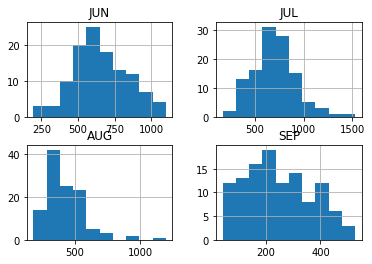

In [25]:
#Let's see hoe the rainfall index vary during rainy season
import matplotlib.pyplot as plt
%matplotlib inline
c = data[['JUN','JUL','AUG','SEP']]
c.hist()
plt.show()

In [26]:
#Data might be widely distributed so let's scale it between 0 and 1
from sklearn import preprocessing
minmax = preprocessing.MinMaxScaler(feature_range=(0,1))
minmax.fit(x).transform(x)

array([[0.        , 0.34371257, 0.56582278, ..., 0.39727673, 0.95570189,
        0.2388724 ],
       [0.00877193, 0.08023952, 0.03291139, ..., 0.5804966 , 0.37952709,
        0.60039565],
       [0.01754386, 0.03832335, 0.23544304, ..., 0.57188626, 0.37563604,
        0.29129575],
       ...,
       [0.98245614, 0.04670659, 0.50759494, ..., 0.38325991, 0.36935049,
        0.08358061],
       [0.99122807, 0.05508982, 0.13037975, ..., 0.57468963, 0.20353188,
        0.23293769],
       [1.        , 0.03712575, 0.07341772, ..., 0.47977573, 0.57497755,
        0.39218595]])

In [27]:
#Let's divide the dataset into 2 sets:train and test in ratio (4:1)
from sklearn import model_selection,neighbors
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

3987    0
3903    0
3934    1
3963    0
3892    0
3989    0
3909    1
4001    0
3961    1
3935    0
3986    0
3910    1
3929    0
3930    0
3927    0
3982    0
3942    0
3953    0
3898    1
3888    1
3957    1
3976    0
3943    1
Name: FLOOD, dtype: int64


In [ ]:
y_train.head()

3891    0
3931    0
4000    1
3928    0
3936    1
Name: FLOOD, dtype: int64

In [28]:

x_train_std = minmax.fit_transform(x_train)
x_test_std = minmax.transform(x_test)
y_train


3944    0
3995    0
3933    1
3985    0
3910    1
       ..
3902    1
3972    0
3888    1
4000    1
3964    0
Name: FLOOD, Length: 92, dtype: int64

In [39]:
from sklearn.model_selection import cross_val_score

clf = neighbors.KNeighborsClassifier()
knn_clf = clf.fit(x_train,y_train)

lr_accuracy = cross_val_score(knn_clf,x_test_std,y_test,cv=3,scoring='accuracy',n_jobs=-1)
 


In [40]:
lr_accuracy.mean()

0.6011904761904762

In [51]:
x_test = []
raindata=[]
raindata.append(2020)
print('Enter the estimated rainfall data of the present year of the location\n')
raindata.append(float(input('Jan:')))
raindata.append(float(input('Feb:')))
raindata.append(float(input('Mar:')))
raindata.append(float(input('Apr:')))
raindata.append(float(input('May:')))
raindata.append(float(input('Jun:')))
raindata.append(float(input('Jul:')))
raindata.append(float(input('Aug:')))
raindata.append(float(input('Sep:')))
raindata.append(float(input('Oct:')))
raindata.append(float(input('Nov:')))
raindata.append(float2(input('Dec:')))
x_test.append(raindata)

Enter the estimated rainfall data of the present year of the location

Jan:36.3
Feb:323.3
Mar:23.3
Apr:23.3
May:12.4
Jun:323.5
Jul:543.4
Aug:233.3
Sep:34.5
Oct:21.1
Nov:33.3
Dec:11.2


In [53]:
y_predict = knn_clf.predict(x_test)
print('Predicted chances of flood')
if y_predict[0]==0:
  print('No chance of occurence of flood')
else:
  print('There is chance of occurence of flood')

Predicted chances of flood
No chance of occurence of flood
